# **IT BRI (Cyber University) | Preprocessing & EDA**

## **Data Cleaning & Preprocessing**

### Import libraries

In [599]:
import pandas as pd
import string
import re
import ast
import numpy as np
import nltk
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [600]:
df = pd.read_csv('../../dataset/labeled_data/ItBRI_labelled.csv')

output_path = '../../../dataset/cleaned_data/ItBRI_labelled_cleaned.csv'

print(df.shape)
print(df.info())
df.head()


(78, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   page            78 non-null     int64  
 1   name            78 non-null     object 
 2   link            78 non-null     object 
 3   thumbnail       78 non-null     object 
 4   rating          78 non-null     float64
 5   date            78 non-null     object 
 6   snippet         40 non-null     object 
 7   images          4 non-null      object 
 8   local_guide     27 non-null     object 
 9   label_sentimen  40 non-null     object 
dtypes: float64(1), int64(1), object(8)
memory usage: 6.2+ KB
None


,page,name,link,thumbnail,rating,date,snippet,images,local_guide,label_sentimen
0,1,Mahasiswa Pelajar,https://www.google.com/maps/contrib/1125439316...,https://lh3.googleusercontent.com/a-/ALV-UjVjy...,5.0,seminggu lalu,"Lokasi Kampusnya strategis, 1 menit keluar tol...",NaN,NaN,positif
1,1,Fathia Rizky,https://www.google.com/maps/contrib/1036827544...,https://lh3.googleusercontent.com/a-/ALV-UjXng...,5.0,2 minggu lalu,fasilitas nya ⭐⭐⭐⭐⭐\nac nya masyaallah dingin ...,NaN,True,positif
2,1,Michael Sitorus,https://www.google.com/maps/contrib/1149239308...,https://lh3.googleusercontent.com/a-/ALV-UjVv9...,5.0,setahun lalu,Kampus yang cocok untuk era digitalisasi dan m...,['https://lh5.googleusercontent.com/p/AF1QipPj...,True,positif
3,1,Malinda Malinda,https://www.google.com/maps/contrib/1027179724...,https://lh3.googleusercontent.com/a-/ALV-UjVeh...,5.0,2 minggu lalu,"dosen dosen Universitas Siber Indonesia, berpe...",NaN,True,positif
4,1,Yudi Mulyawan,https://www.google.com/maps/contrib/1022158108...,https://lh3.googleusercontent.com/a-/ALV-UjWFg...,5.0,setahun lalu,"Kampus saya makin keren aja,\n😁, sebagai angka...",NaN,NaN,positif


In [601]:
df['rating'].describe()

count    78.000000
mean      4.974359
std       0.159085
min       4.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: rating, dtype: float64

### Hapus kolom yang tidak diperlukan

In [602]:
df.columns

Index(['page', 'name', 'link', 'thumbnail', 'rating', 'date', 'snippet',
       'images', 'local_guide', 'label_sentimen'],
      dtype='object')

In [603]:
# drop the columns
df = df.drop(columns=['page', 'name', 'link', 'thumbnail', 'date', 'images', 'local_guide'], axis=1)
df.head(10)

,rating,snippet,label_sentimen
0,5.0,"Lokasi Kampusnya strategis, 1 menit keluar tol...",positif
1,5.0,fasilitas nya ⭐⭐⭐⭐⭐\nac nya masyaallah dingin ...,positif
2,5.0,Kampus yang cocok untuk era digitalisasi dan m...,positif
3,5.0,"dosen dosen Universitas Siber Indonesia, berpe...",positif
4,5.0,"Kampus saya makin keren aja,\n😁, sebagai angka...",positif
5,5.0,"Pengajar yg bepengalam, kampus yg nyaman, biay...",positif
6,5.0,"Berawal dari BRI Institute, menjadikan Cyber U...",positif
7,5.0,ternyata ada kampus bagus di TB Simatupang...,positif
8,5.0,Baik sekali,positif
9,5.0,"Kampusnya sangat nyaman terutama di perpusnya,...",positif


### Convert to lowercase

In [604]:
df['snippet'] = df['snippet'].str.lower()
df.head()

,rating,snippet,label_sentimen
0,5.0,"lokasi kampusnya strategis, 1 menit keluar tol...",positif
1,5.0,fasilitas nya ⭐⭐⭐⭐⭐\nac nya masyaallah dingin ...,positif
2,5.0,kampus yang cocok untuk era digitalisasi dan m...,positif
3,5.0,"dosen dosen universitas siber indonesia, berpe...",positif
4,5.0,"kampus saya makin keren aja,\n😁, sebagai angka...",positif


### Hapus Missing Values

In [605]:
df.shape

(78, 3)

In [606]:
df.isnull().sum()

rating             0
snippet           38
label_sentimen    38
dtype: int64

In [607]:
df = df.dropna()
df.head()

,rating,snippet,label_sentimen
0,5.0,"lokasi kampusnya strategis, 1 menit keluar tol...",positif
1,5.0,fasilitas nya ⭐⭐⭐⭐⭐\nac nya masyaallah dingin ...,positif
2,5.0,kampus yang cocok untuk era digitalisasi dan m...,positif
3,5.0,"dosen dosen universitas siber indonesia, berpe...",positif
4,5.0,"kampus saya makin keren aja,\n😁, sebagai angka...",positif


In [608]:
df.isnull().sum()

rating            0
snippet           0
label_sentimen    0
dtype: int64

In [609]:
df.shape

(40, 3)

### Menghapus Whitespace

In [610]:
def remove_extra_whitespace(text):
    # Menghapus spasi di awal dan akhir teks
    text = text.strip()
    # Menghapus spasi berlebih di tengah teks
    text = re.sub('\s+', ' ', text)
    return text

df['snippet'] = df['snippet'].apply(remove_extra_whitespace)

In [611]:
df.head()

,rating,snippet,label_sentimen
0,5.0,"lokasi kampusnya strategis, 1 menit keluar tol...",positif
1,5.0,fasilitas nya ⭐⭐⭐⭐⭐ ac nya masyaallah dingin b...,positif
2,5.0,kampus yang cocok untuk era digitalisasi dan m...,positif
3,5.0,"dosen dosen universitas siber indonesia, berpe...",positif
4,5.0,"kampus saya makin keren aja, 😁, sebagai angkat...",positif


### Hapus Punctuation

In [612]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [613]:
def remove_punctuations(text):
    punctuations = string.punctuation
    return text.translate(str.maketrans('', '', punctuations))

df['snippet'] = df['snippet'].apply(remove_punctuations)

In [614]:
df.head()

,rating,snippet,label_sentimen
0,5.0,lokasi kampusnya strategis 1 menit keluar tol ...,positif
1,5.0,fasilitas nya ⭐⭐⭐⭐⭐ ac nya masyaallah dingin b...,positif
2,5.0,kampus yang cocok untuk era digitalisasi dan m...,positif
3,5.0,dosen dosen universitas siber indonesia berpen...,positif
4,5.0,kampus saya makin keren aja 😁 sebagai angkatan...,positif


### Visualisasi sebelum preprocessing

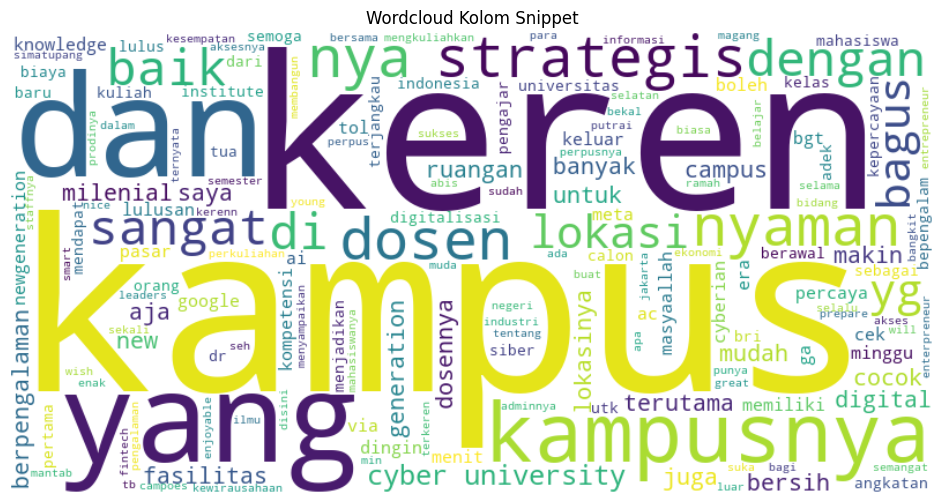

In [615]:
# Gabungkan semua teks dari kolom 'snippet' yang tidak null
text = " ".join(df['snippet'].dropna())

# Buat dan tampilkan wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Kolom Snippet')
plt.show()

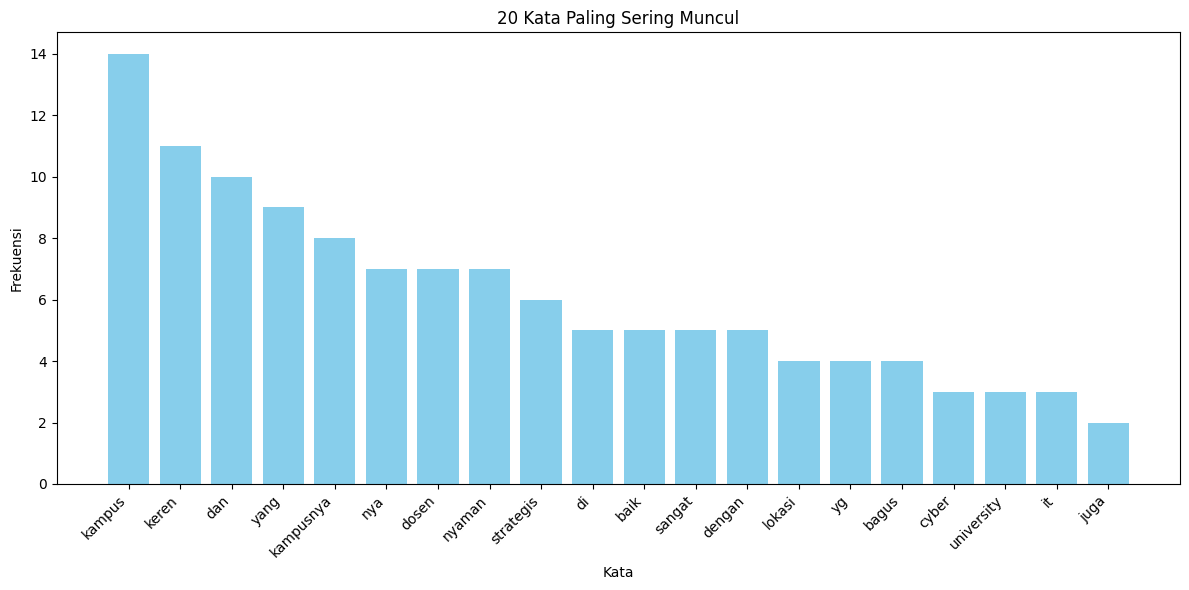

In [616]:
from collections import Counter

# Tokenisasi dan hitung frekuensi kata
words = text.split()
word_freq = Counter(words)

# Ambil 20 kata paling sering muncul
most_common = word_freq.most_common(20)
words_plot, counts_plot = zip(*most_common)

plt.figure(figsize=(12,6))
plt.bar(words_plot, counts_plot, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('20 Kata Paling Sering Muncul')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

### Hapus special characters / emot

In [617]:
df.head()

,rating,snippet,label_sentimen
0,5.0,lokasi kampusnya strategis 1 menit keluar tol ...,positif
1,5.0,fasilitas nya ⭐⭐⭐⭐⭐ ac nya masyaallah dingin b...,positif
2,5.0,kampus yang cocok untuk era digitalisasi dan m...,positif
3,5.0,dosen dosen universitas siber indonesia berpen...,positif
4,5.0,kampus saya makin keren aja 😁 sebagai angkatan...,positif


In [618]:
def remove_spl_chars(text):
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text

df['snippet'] = df['snippet'].apply(remove_spl_chars)

In [619]:
df.head(10)

,rating,snippet,label_sentimen
0,5.0,lokasi kampusnya strategis 1 menit keluar tol ...,positif
1,5.0,fasilitas nya ac nya masyaallah dingin bgt,positif
2,5.0,kampus yang cocok untuk era digitalisasi dan m...,positif
3,5.0,dosen dosen universitas siber indonesia berpen...,positif
4,5.0,kampus saya makin keren aja sebagai angkatan p...,positif
5,5.0,pengajar yg bepengalam kampus yg nyaman biaya ...,positif
6,5.0,berawal dari bri institute menjadikan cyber un...,positif
7,5.0,ternyata ada kampus bagus di tb simatupang,positif
8,5.0,baik sekali,positif
9,5.0,kampusnya sangat nyaman terutama di perpusnya ...,positif


### Normalisasi

In [620]:
# Load kamus slang
with open('kamus_slang.json', encoding='utf-8') as f:
    slang_dict = ast.literal_eval(f.read())

# Fungsi untuk mengganti kata slang dengan kata yang sudah dinormalisasi
def normalize_text(text):
    words = text.split()
    normalized_words = [slang_dict.get(word, word) for word in words]
    return " ".join(normalized_words)

# Menerapkan normalisasi pada kolom snippet
df['snippet'] = df['snippet'].apply(lambda x: normalize_text(x))
df.head(10)
    

,rating,snippet,label_sentimen
0,5.0,lokasi kampusnya strategis 1 menit keluar tol ...,positif
1,5.0,fasilitas nya ac nya masyaallah dingin banget,positif
2,5.0,kampus yang cocok untuk era digitalisasi dan m...,positif
3,5.0,dosen dosen universitas siber indonesia berpen...,positif
4,5.0,kampus saya makin keren saja sebagai angkatan ...,positif
5,5.0,pengajar yang bepengalam kampus yang nyaman bi...,positif
6,5.0,berawal dari bri institute menjadikan cyber un...,positif
7,5.0,ternyata ada kampus bagus di tb simatupang,positif
8,5.0,baik sekali,positif
9,5.0,kampusnya sangat nyaman terutama di perpusnya ...,positif


### Tokenisasi

In [621]:
def tokenize_text(text):
    # Tokenisasi teks
    tokens = text.split()
    # Mengembalikan daftar token
    return tokens

df['tokens'] = df['snippet'].apply(tokenize_text)

df.head(10)

,rating,snippet,label_sentimen,tokens
0,5.0,lokasi kampusnya strategis 1 menit keluar tol ...,positif,"[lokasi, kampusnya, strategis, 1, menit, kelua..."
1,5.0,fasilitas nya ac nya masyaallah dingin banget,positif,"[fasilitas, nya, ac, nya, masyaallah, dingin, ..."
2,5.0,kampus yang cocok untuk era digitalisasi dan m...,positif,"[kampus, yang, cocok, untuk, era, digitalisasi..."
3,5.0,dosen dosen universitas siber indonesia berpen...,positif,"[dosen, dosen, universitas, siber, indonesia, ..."
4,5.0,kampus saya makin keren saja sebagai angkatan ...,positif,"[kampus, saya, makin, keren, saja, sebagai, an..."
5,5.0,pengajar yang bepengalam kampus yang nyaman bi...,positif,"[pengajar, yang, bepengalam, kampus, yang, nya..."
6,5.0,berawal dari bri institute menjadikan cyber un...,positif,"[berawal, dari, bri, institute, menjadikan, cy..."
7,5.0,ternyata ada kampus bagus di tb simatupang,positif,"[ternyata, ada, kampus, bagus, di, tb, simatup..."
8,5.0,baik sekali,positif,"[baik, sekali]"
9,5.0,kampusnya sangat nyaman terutama di perpusnya ...,positif,"[kampusnya, sangat, nyaman, terutama, di, perp..."


### Stopwords Removal

In [622]:
from nltk.corpus import stopwords
# Download stopwords if not already downloaded
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [623]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['tokens'] = df['tokens'].apply(remove_stopwords)
df.head(10)


,rating,snippet,label_sentimen,tokens
0,5.0,lokasi kampusnya strategis 1 menit keluar tol ...,positif,"[lokasi, kampusnya, strategis, 1, menit, tol, ..."
1,5.0,fasilitas nya ac nya masyaallah dingin banget,positif,"[fasilitas, nya, ac, nya, masyaallah, dingin, ..."
2,5.0,kampus yang cocok untuk era digitalisasi dan m...,positif,"[kampus, cocok, era, digitalisasi, milenial, k..."
3,5.0,dosen dosen universitas siber indonesia berpen...,positif,"[dosen, dosen, universitas, siber, indonesia, ..."
4,5.0,kampus saya makin keren saja sebagai angkatan ...,positif,"[kampus, keren, angkatan, lulus, semoga, adek,..."
5,5.0,pengajar yang bepengalam kampus yang nyaman bi...,positif,"[pengajar, bepengalam, kampus, nyaman, biaya, ..."
6,5.0,berawal dari bri institute menjadikan cyber un...,positif,"[bri, institute, menjadikan, cyber, university..."
7,5.0,ternyata ada kampus bagus di tb simatupang,positif,"[kampus, bagus, tb, simatupang]"
8,5.0,baik sekali,positif,[]
9,5.0,kampusnya sangat nyaman terutama di perpusnya ...,positif,"[kampusnya, nyaman, perpusnya, lokasi, strategis]"


### Stemming dengan Sastrawi


In [624]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['tokens'] = df['tokens'].apply(stem_text)
df.head(10)

,rating,snippet,label_sentimen,tokens
0,5.0,lokasi kampusnya strategis 1 menit keluar tol ...,positif,"[lokasi, kampus, strategis, 1, menit, tol, pas..."
1,5.0,fasilitas nya ac nya masyaallah dingin banget,positif,"[fasilitas, nya, ac, nya, masyaallah, dingin, ..."
2,5.0,kampus yang cocok untuk era digitalisasi dan m...,positif,"[kampus, cocok, era, digitalisasi, milenial, k..."
3,5.0,dosen dosen universitas siber indonesia berpen...,positif,"[dosen, dosen, universitas, siber, indonesia, ..."
4,5.0,kampus saya makin keren saja sebagai angkatan ...,positif,"[kampus, keren, angkat, lulus, moga, adek, kel..."
5,5.0,pengajar yang bepengalam kampus yang nyaman bi...,positif,"[ajar, bepengalam, kampus, nyaman, biaya, kuli..."
6,5.0,berawal dari bri institute menjadikan cyber un...,positif,"[bri, institute, jadi, cyber, university, kamp..."
7,5.0,ternyata ada kampus bagus di tb simatupang,positif,"[kampus, bagus, tb, simatupang]"
8,5.0,baik sekali,positif,[]
9,5.0,kampusnya sangat nyaman terutama di perpusnya ...,positif,"[kampus, nyaman, pus, lokasi, strategis]"


### Visualisasi setelah preprocessing

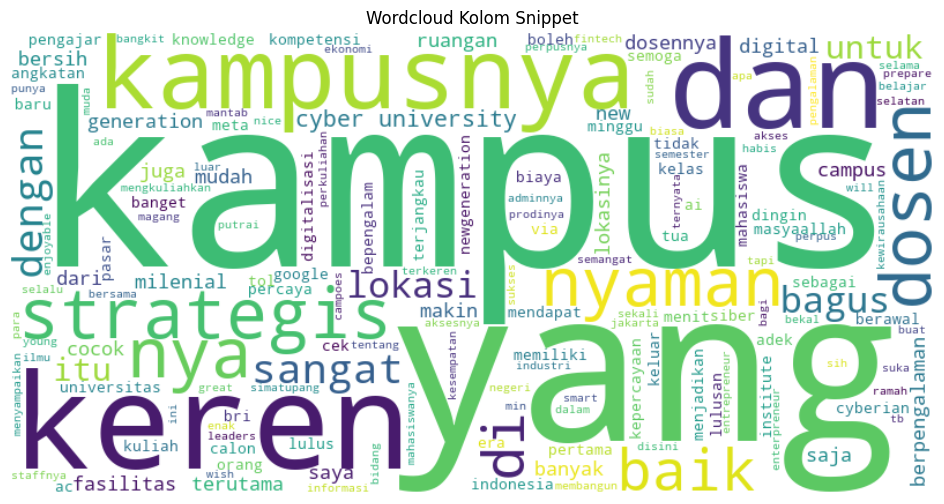

In [625]:
# Gabungkan semua teks dari kolom 'snippet' yang tidak null
text = " ".join(df['snippet'].dropna())

# Buat dan tampilkan wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Kolom Snippet')
plt.show()

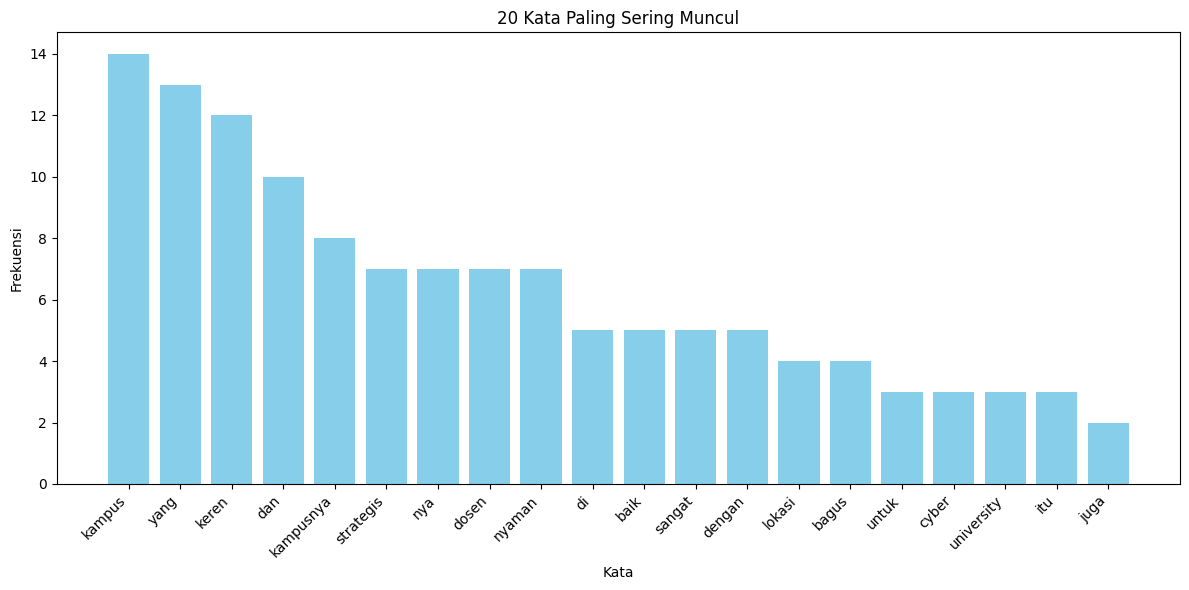

In [626]:
from collections import Counter

# Tokenisasi dan hitung frekuensi kata
words = text.split()
word_freq = Counter(words)

# Ambil 20 kata paling sering muncul
most_common = word_freq.most_common(20)
words_plot, counts_plot = zip(*most_common)

plt.figure(figsize=(12,6))
plt.bar(words_plot, counts_plot, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('20 Kata Paling Sering Muncul')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

### Simpan dataset bersih


In [627]:
output_path = '../../dataset/cleaned_dataset/ItBRI_labelled_cleaned.csv'

try:
	# Save the dataframe to a CSV file
	df.to_csv(output_path, index=False)
	print(f"DataFrame successfully saved to {output_path}")
except Exception as e:
	print(f"An error occurred: {e}")

DataFrame successfully saved to ../../dataset/cleaned_dataset/ItBRI_labelled_cleaned.csv


## **Exploratory Data Analysis (EDA)**

In [628]:
df['rating'].unique()

array([5.])

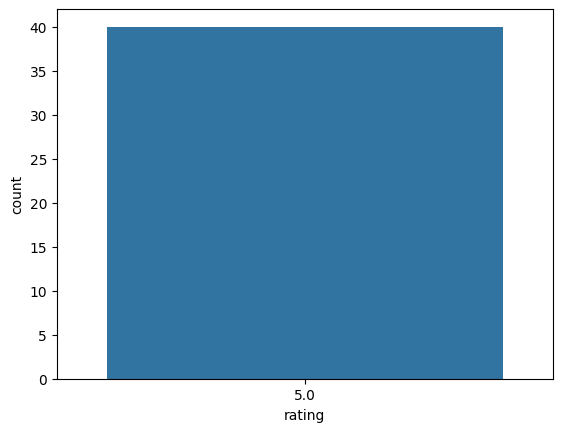

rating
5.0    40
Name: count, dtype: int64


In [629]:
sns.countplot(x=df['rating'])
plt.show()
print(df['rating'].value_counts())

In [630]:
df['label_sentimen'].unique()

array(['positif', 'netral'], dtype=object)

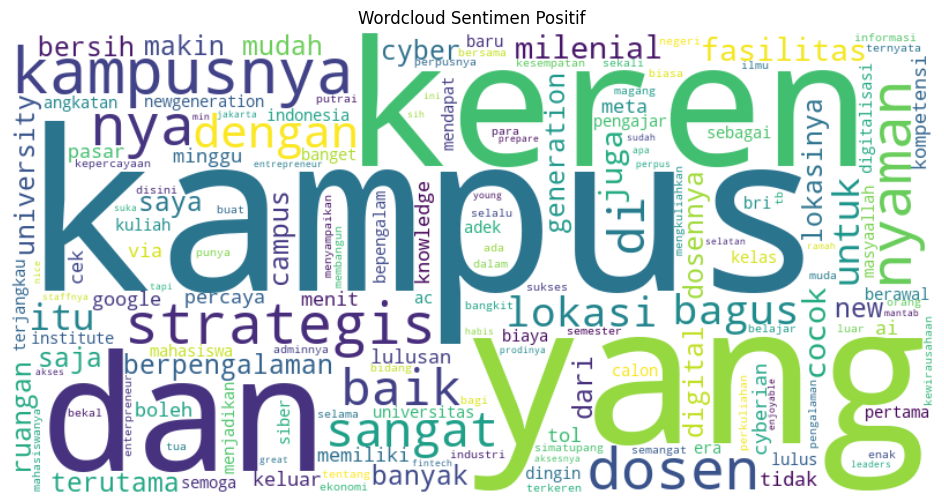

In [631]:
# Visualisasi Wordcloud untuk sentimen positif
text_positif = " ".join(df[df['label_sentimen'] == 'positif']['snippet'].dropna())
wordcloud_positif = WordCloud(width=800, height=400, background_color='white').generate(text_positif)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_positif, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Sentimen Positif')
plt.show()

In [632]:
# # Visualisasi Wordcloud untuk masing-masing sentimen
# sentiments = ['positif', 'negatif', 'netral']
# plt.figure(figsize=(18, 5))

# for i, sentiment in enumerate(sentiments):
#     text_sentiment = " ".join(df[df['label_sentimen'] == sentiment]['snippet'].dropna())
#     wordcloud = WordCloud(width=600, height=300, background_color='white').generate(text_sentiment)
#     plt.subplot(1, 3, i+1)
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis('off')
#     plt.title(f'Wordcloud Sentimen {sentiment.capitalize()}')

# plt.tight_layout()
# plt.show()

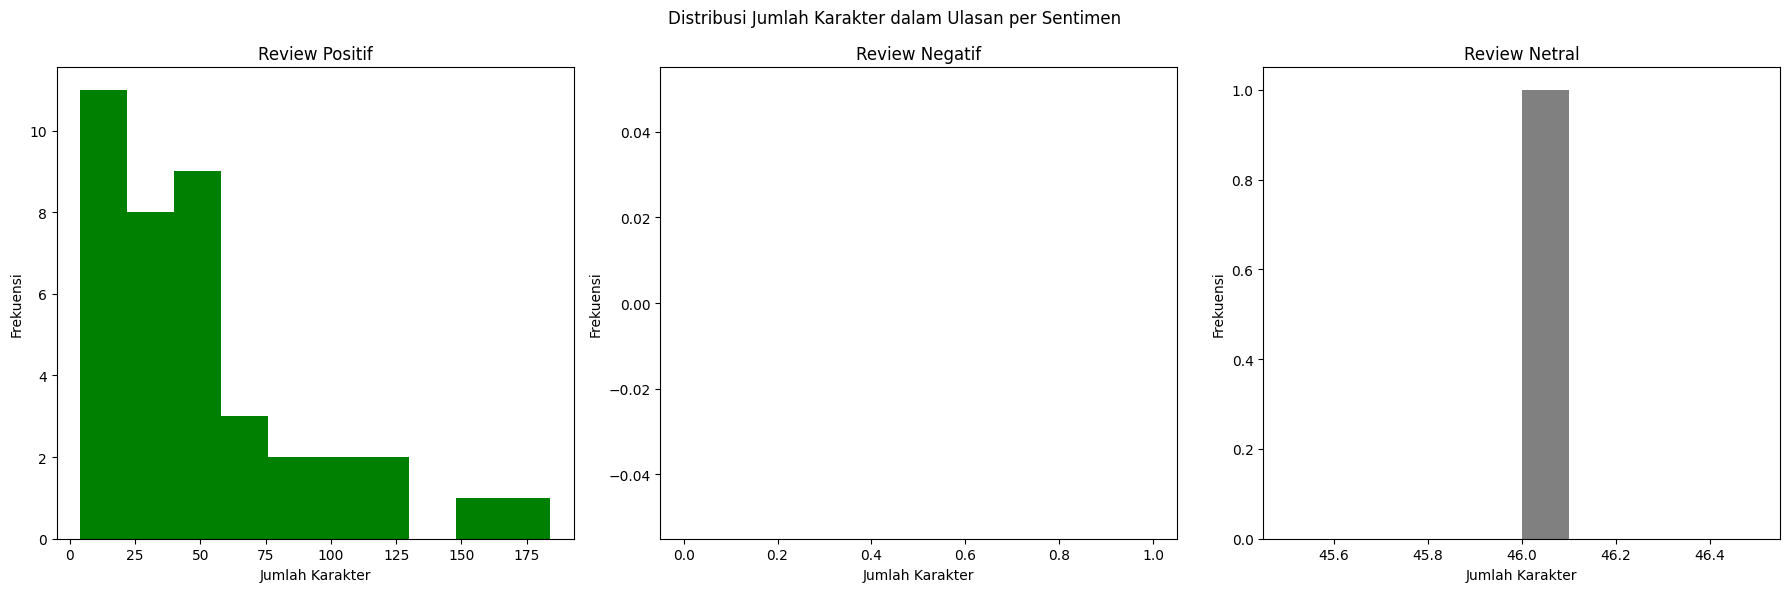

In [633]:
figure, axes = plt.subplots(1, 3, figsize=(18, 6))
sentiments = ['positif', 'negatif', 'netral']
colors = ['green', 'red', 'gray']

for i, sentiment in enumerate(sentiments):
    review_lengths = df[df['label_sentimen'] == sentiment]['snippet'].str.len()
    axes[i].hist(review_lengths, color=colors[i])
    axes[i].set_title(f'Review {sentiment.capitalize()}')
    axes[i].set_xlabel('Jumlah Karakter')
    axes[i].set_ylabel('Frekuensi')

figure.suptitle('Distribusi Jumlah Karakter dalam Ulasan per Sentimen')
plt.tight_layout()
plt.show()


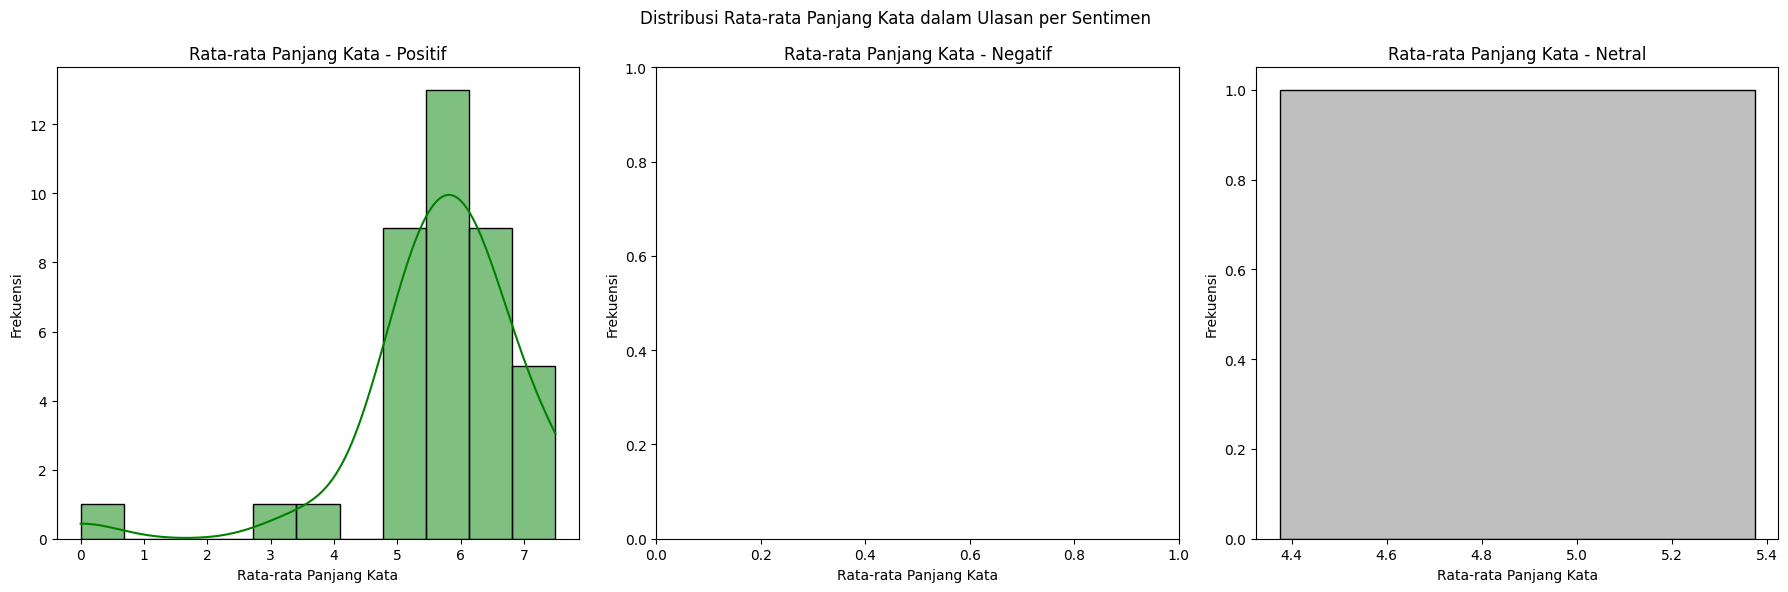

In [634]:
figure, axes = plt.subplots(1, 3, figsize=(18, 6))
sentiments = ['positif', 'negatif', 'netral']
colors = ['green', 'red', 'gray']

for i, sentiment in enumerate(sentiments):
    # Ambil token untuk setiap sentimen
    tokens = df[df['label_sentimen'] == sentiment]['tokens']
    # Hitung rata-rata panjang kata per ulasan
    avg_word_length = tokens.apply(lambda x: np.mean([len(word) for word in x]) if x else 0)
    sns.histplot(avg_word_length, ax=axes[i], color=colors[i], kde=True)
    axes[i].set_title(f'Rata-rata Panjang Kata - {sentiment.capitalize()}')
    axes[i].set_xlabel('Rata-rata Panjang Kata')
    axes[i].set_ylabel('Frekuensi')

figure.suptitle('Distribusi Rata-rata Panjang Kata dalam Ulasan per Sentimen')
plt.tight_layout()
plt.show()


In [635]:
# Visualisasi untuk sentimen positif
corpus_positif = df[df['label_sentimen'] == 'positif']['snippet']
most_common_uni_positif = get_top_text_ngrams(corpus_positif, 20, 1)
most_common_uni_positif = dict(most_common_uni_positif)

temp_positif = pd.DataFrame({
    "Common_words": list(most_common_uni_positif.keys()),
    "Count": list(most_common_uni_positif.values())
})

fig_positif = px.bar(
    temp_positif, x="Count", y="Common_words",
    title="Common Words in Positif Reviews",
    orientation='h', width=700, height=700, color="Common_words"
)
fig_positif.show()

# # Visualisasi untuk sentimen negatif
# corpus_negatif = df[df['label_sentimen'] == 'negatif']['snippet']
# most_common_uni_negatif = get_top_text_ngrams(corpus_negatif, 20, 1)
# most_common_uni_negatif = dict(most_common_uni_negatif)

# temp_negatif = pd.DataFrame({
#     "Common_words": list(most_common_uni_negatif.keys()),
#     "Count": list(most_common_uni_negatif.values())
# })

# fig_negatif = px.bar(
#     temp_negatif, x="Count", y="Common_words",
#     title="Common Words in Negatif Reviews",
#     orientation='h', width=700, height=700, color="Common_words"
# )
# fig_negatif.show()

# Visualisasi untuk sentimen netral
corpus_netral = df[df['label_sentimen'] == 'netral']['snippet']
most_common_uni_netral = get_top_text_ngrams(corpus_netral, 20, 1)
most_common_uni_netral = dict(most_common_uni_netral)

temp_netral = pd.DataFrame({
    "Common_words": list(most_common_uni_netral.keys()),
    "Count": list(most_common_uni_netral.values())
})

fig_netral = px.bar(
    temp_netral, x="Count", y="Common_words",
    title="Common Words in Netral Reviews",
    orientation='h', width=700, height=700, color="Common_words"
)
fig_netral.show()
